In [91]:
import imageio
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.utils.data as data
from torchvision import transforms, utils
import torch.nn as nn
import torch.optim as optim
import time
import cv2

%matplotlib inline

In [97]:
images = glob.glob("real_ds_val/*.png")

Before crop (2048, 2448, 3)
After crop (1024, 2048, 3)
After resize (512, 1024, 3)
After padding (1024, 1024, 3)


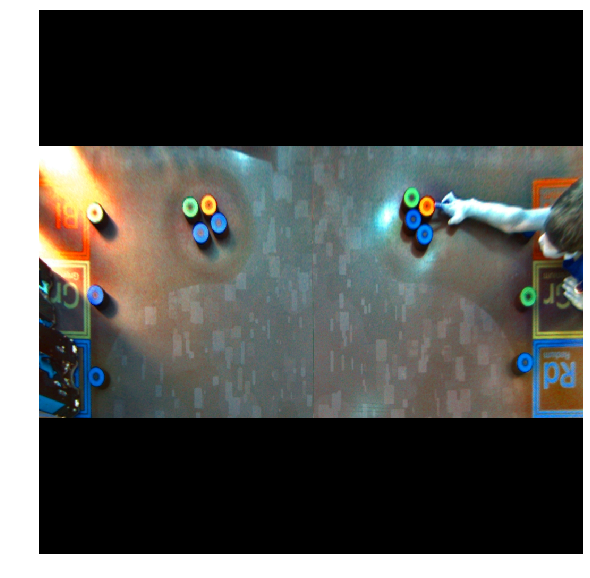

In [100]:
plt.figure(figsize=(10,10))

img = cv2.imread(images[np.random.randint(len(images))], cv2.IMREAD_COLOR)
print("Before crop", img.shape)
cropped_img = img[724:1748, 200:2248]
print("After crop", cropped_img.shape)
background = cropped_img
background = cv2.resize(cropped_img, (1024,512), interpolation = cv2.INTER_LANCZOS4)
print("After resize", background.shape)
background = np.pad(background, ((256, 256), (0,0), (0,0)), mode="constant", constant_values=0)
print("After padding", background.shape)
hsvImg = cv2.cvtColor(background, cv2.COLOR_BGR2HSV)
hsvImg[:,:,1] = cv2.multiply(hsvImg[:,:,1], 2)
background = cv2.cvtColor(hsvImg, cv2.COLOR_HSV2BGR)
plt.imshow(background)
plt.axis("off")
plt.show()
#background.save("test.png")

### Generate dataset #1

In [101]:
for i, image in enumerate(images):
    print(image)
    img = cv2.imread(image, cv2.IMREAD_COLOR)
    cropped_img = img[724:1748, 200:2248]
    background = cropped_img
    background = cv2.resize(cropped_img, (1024,512), interpolation = cv2.INTER_LANCZOS4)
    background = np.pad(background, ((256, 256), (0,0), (0,0)), mode="constant", constant_values=0)
    hsvImg = cv2.cvtColor(background, cv2.COLOR_BGR2HSV)
    hsvImg[:,:,1] = cv2.multiply(hsvImg[:,:,1], 2)
    background = cv2.cvtColor(hsvImg, cv2.COLOR_HSV2BGR)
    cv2.imwrite("dataset1024/val_img_raw/" + str(i) + ".png", background)

real_ds_val/undistorted_image_8676.png
real_ds_val/undistorted_image_55.png
real_ds_val/undistorted_image_71.png
real_ds_val/undistorted_image_2.png
real_ds_val/undistorted_image_135.png
real_ds_val/undistorted_image_8633.png
real_ds_val/undistorted_image_67.png
real_ds_val/undistorted_image_34.png
